In [35]:
# copy of poduv.m
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# read the test data
!ls ../../test

06302014_2Hz_particles000200.T000.D000.P000.H000.L.vec
06302014_2Hz_particles000201.T000.D000.P000.H000.L.vec
06302014_2Hz_particles000202.T000.D000.P000.H000.L.vec
06302014_2Hz_particles000203.T000.D000.P000.H000.L.vec
06302014_2Hz_particles000204.T000.D000.P000.H000.L.vec
06302014_2Hz_particles000205.T000.D000.P000.H000.L.vec
06302014_2Hz_particles000206.T000.D000.P000.H000.L.vec
06302014_2Hz_particles000207.T000.D000.P000.H000.L.vec
06302014_2Hz_particles000208.T000.D000.P000.H000.L.vec
06302014_2Hz_particles000209.T000.D000.P000.H000.L.vec
06302014_2Hz_particles000210.T000.D000.P000.H000.L.vec


In [37]:
def read_vec_file(fname):
    data = np.genfromtxt(fname, skip_header=1, delimiter=',',usecols=(0,1,2,3,4))

    # how to convert into a 2D spatial field
    x = np.unique(data[:,0])
    y = np.unique(data[:,1])
    X,Y = np.meshgrid(x,y)
    U,V,CHC = np.zeros(X.shape), np.zeros(X.shape), np.zeros(X.shape)
    for row in range(len(data[:,0])):
        x,y,u,v,chc = data[row,:]
        j,i = np.where(X==x)[1][0], np.where(Y==y)[0][0]
        U[i,j],V[i,j],CHC[i,j] = u,v,chc
    return X,Y,U,V,CHC

In [40]:
# how to read a single file
fname = '../../test/06302014_2Hz_particles000200.T000.D000.P000.H000.L.vec'
X,Y,U,V,CHC = read_vec_file(fname)

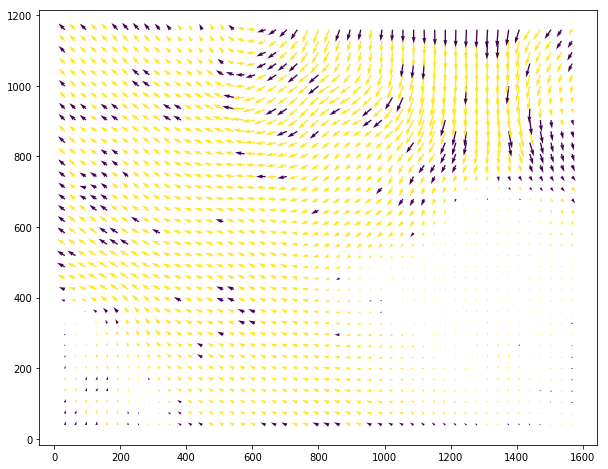

In [41]:
fig,ax = plt.subplots(figsize=(10,8))
ax.quiver(X,Y,U,V,CHC)
# ax.invert_yaxis()

In [42]:
# how to read all the files in a folder into a 3D array
from glob import glob
import os

In [53]:
list_of_vec_files = glob('../../test/*.vec')
list_of_vec_files.sort()
list_of_vec_files

['../../test/06302014_2Hz_particles000200.T000.D000.P000.H000.L.vec',
 '../../test/06302014_2Hz_particles000201.T000.D000.P000.H000.L.vec',
 '../../test/06302014_2Hz_particles000202.T000.D000.P000.H000.L.vec',
 '../../test/06302014_2Hz_particles000203.T000.D000.P000.H000.L.vec',
 '../../test/06302014_2Hz_particles000204.T000.D000.P000.H000.L.vec',
 '../../test/06302014_2Hz_particles000205.T000.D000.P000.H000.L.vec',
 '../../test/06302014_2Hz_particles000206.T000.D000.P000.H000.L.vec',
 '../../test/06302014_2Hz_particles000207.T000.D000.P000.H000.L.vec',
 '../../test/06302014_2Hz_particles000208.T000.D000.P000.H000.L.vec',
 '../../test/06302014_2Hz_particles000209.T000.D000.P000.H000.L.vec',
 '../../test/06302014_2Hz_particles000210.T000.D000.P000.H000.L.vec']

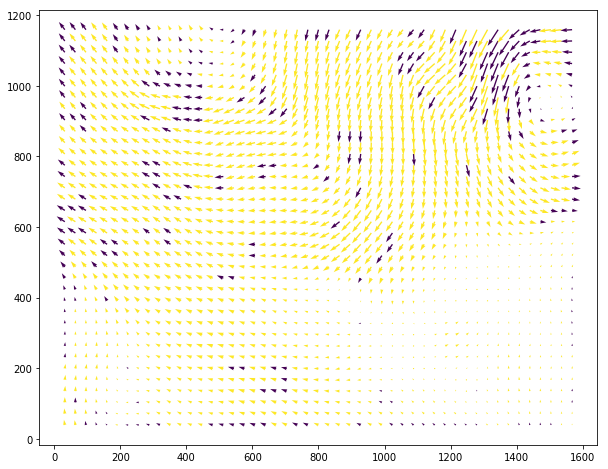

In [59]:
U,V,CHC = [],[],[]
for fname in list_of_vec_files:
    X,Y,u,v,chc = read_vec_file(fname)
    U.append(u)
    V.append(v)
    CHC.append(chc)

fig,ax = plt.subplots(figsize=(10,8))
ax.quiver(X,Y,U[-1],V[-1],CHC[-1])

In [ ]:
# read data and rearrange in columns
r,c,N = u.shape	# 4-D is the number of files

len = r*c;

U = zeros(len*2,N);         # r*c*3 length of the vector

% small rearrangement
for i = 1:N
    U(1:len,i) = reshape(handles.u(:,:,i),len,1);
    U(len+1:2*len,i) = reshape(handles.v(:,:,i),len,1);
end

% Ensemble average of U:
%         meanU = mean(U,2);
%         Uf = U;
% meanU = zeros(len,1);
% Fluctuations
%        % Uf = U - repmat(meanU,1,N);
%         for i = 1:N
%             Uf(:,i) = U(:,i) - meanU;
%         end

Uf = bsxfun(@minus,U,mean(U,2));